In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons

# 1. Define Activation Functions & Derivatives
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# 2. Loss Function (Binary Cross Entropy)
def compute_loss(Y, A):
    m = Y.shape[1]
    # Add epsilon to prevent log(0)
    logprobs = np.multiply(np.log(A + 1e-15), Y) + np.multiply(np.log(1 - A + 1e-15), 1 - Y)
    cost = -1/m * np.sum(logprobs)
    return np.squeeze(cost)

# 3. Visualization Helper
def plot_decision_boundary(model_predict_func, X, Y, title):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 0.5, X[0, :].max() + 0.5
    y_min, y_max = X[1, :].min() - 0.5, X[1, :].max() + 0.5
    h = 0.01
    
    # Generate a grid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = model_predict_func(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title(title)
    plt.show()

Training Linear Model...


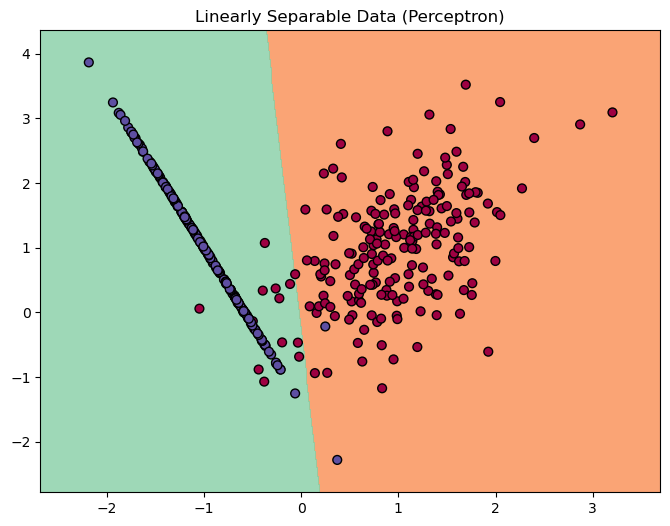

In [2]:
# --- STEP A: Generate Linear Data ---
X_linear, Y_linear = make_classification(n_samples=400, n_features=2, n_redundant=0, 
                                         n_informative=2, random_state=1, n_clusters_per_class=1)
X_linear = X_linear.T  # Shape (2, 400)
Y_linear = Y_linear.reshape(1, 400) # Shape (1, 400)

# --- STEP B: Build Linear Model (Single Layer) ---
def train_linear_model(X, Y, learning_rate=0.01, epochs=1000):
    n_x = X.shape[0] # Inputs (2 features)
    m = X.shape[1]   # Examples
    
    # Initialize weights (No hidden layer)
    W = np.random.randn(1, n_x) * 0.01
    b = np.zeros((1, 1))
    
    for i in range(epochs):
        # Forward Prop
        Z = np.dot(W, X) + b
        A = sigmoid(Z)
        
        # Backward Prop (Gradients)
        dZ = A - Y
        dW = (1/m) * np.dot(dZ, X.T)
        db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        
        # Update
        W -= learning_rate * dW
        b -= learning_rate * db
        
    return W, b

# Train and Visualize
print("Training Linear Model...")
W_lin, b_lin = train_linear_model(X_linear, Y_linear)

# Helper to predict for plotting
predict_linear = lambda x: (sigmoid(np.dot(W_lin, x) + b_lin) > 0.5)

plot_decision_boundary(predict_linear, X_linear, Y_linear, "Linearly Separable Data (Perceptron)")


Training Non-Linear Neural Network...
Epoch 0: Loss 0.6931
Epoch 1000: Loss 0.3058
Epoch 2000: Loss 0.0799
Epoch 3000: Loss 0.0759
Epoch 4000: Loss 0.0727
Epoch 5000: Loss 0.0703
Epoch 6000: Loss 0.0687
Epoch 7000: Loss 0.0677
Epoch 8000: Loss 0.0670
Epoch 9000: Loss 0.0665


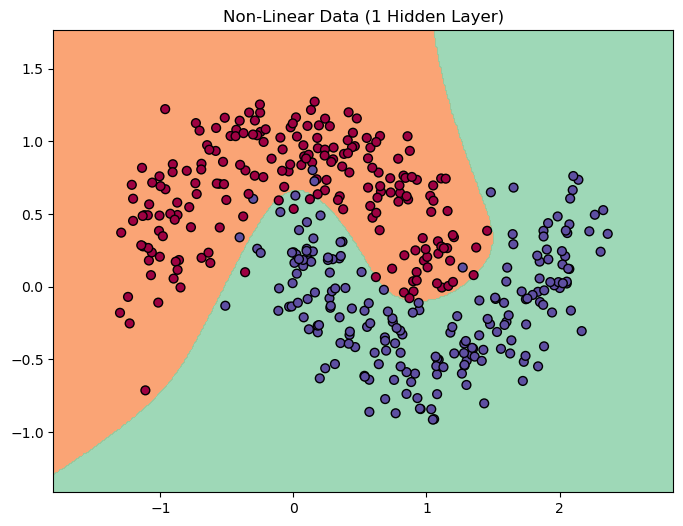

In [3]:
# --- STEP A: Generate Non-Linear Data (Moons) ---
X_moon, Y_moon = make_moons(n_samples=400, noise=0.2, random_state=42)
X_moon = X_moon.T
Y_moon = Y_moon.reshape(1, 400)

# --- STEP B: Build Neural Network (1 Hidden Layer) ---
def train_neural_network(X, Y, n_h, learning_rate=1.2, epochs=10000):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    m = X.shape[1]
    
    # Initialize parameters (Hidden Layer W1/b1, Output Layer W2/b2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    for i in range(epochs):
        # --- Forward Prop ---
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)          # Tanh is often better for hidden layers in simple 2D cases
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)          # Sigmoid for output probability
        
        # --- Backward Prop ---
        dZ2 = A2 - Y
        dW2 = (1/m) * np.dot(dZ2, A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
        
        # Backprop into hidden layer
        dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2)) # Derivative of Tanh
        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
        
        # --- Update Parameters ---
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        
        if i % 1000 == 0:
            loss = compute_loss(Y, A2)
            print(f"Epoch {i}: Loss {loss:.4f}")
            
    return W1, b1, W2, b2

# Train and Visualize
print("\nTraining Non-Linear Neural Network...")
# We use 4 neurons in the hidden layer
W1, b1, W2, b2 = train_neural_network(X_moon, Y_moon, n_h=4)

# Helper to predict
def predict_nn(x):
    Z1 = np.dot(W1, x) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return A2 > 0.5

plot_decision_boundary(predict_nn, X_moon, Y_moon, "Non-Linear Data (1 Hidden Layer)")